In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import a_funciones as fn

In [2]:
cat_m1 = pd.read_csv("va_cat_m1.csv", sep= ',')
num_m1 = pd.read_csv("va_num_m1.csv", sep= ',')
y = pd.read_csv("y.csv", sep= ',')

In [3]:
cat_m1.drop(['Unnamed: 0'],axis=1, inplace=True)
num_m1.drop(['Unnamed: 0'],axis=1, inplace=True)
y.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
# Se importan las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import datasets
from sklearn import tree
from sklearn import metrics

In [5]:
cat_m1=cat_m1.reset_index()
num_m1=num_m1.reset_index()
X=pd.merge(num_m1, cat_m1, how = 'inner', on = 'index')

In [6]:
X=X.drop('index',axis=1)
X

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,...,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,StockOptionLevel_0,StockOptionLevel_1
0,0.206897,0.655833,0.111111,0.279528,0,1,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
1,0.344828,0.209460,0.000000,0.348425,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0.586207,0.966448,0.111111,0.208661,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.068966,0.416071,0.333333,0.244094,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0.344828,0.117106,0.444444,0.405512,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.172414,0.301465,0.333333,0.505906,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4406,0.068966,0.133957,0.222222,0.027559,0,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
4407,0.862069,0.185109,0.000000,0.346457,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4408,0.620690,0.119906,0.000000,0.696850,0,1,0,1,1,0,...,0,1,1,0,0,0,0,1,0,1


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

*Decision Tree Classifier*

In [8]:
#Entrenamiento del modelo
#==============================================================================
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
#Metricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2962
           1       1.00      1.00      1.00       566

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9863945578231292
Test - classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       737
           1       0.97      0.94      0.96       145

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.97       882
weighted avg       0.99      0.99      0.99       882



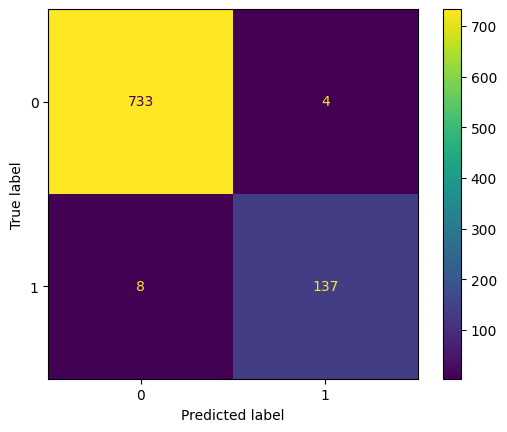

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Matriz de confusión
cm1=confusion_matrix(y_test,clf.predict(X_test))
# Visualización de la matriz de confusión
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1)
cm1_display.plot()
plt.show()

profundidad del arbol: 18
numero de terminales: 248


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'mean_time',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'EducationField_Life Sciences',
       'EducationField_Medical', 'Gender_Female', 'Gender_Male', 'JobLevel_1',
       'JobLevel_2', 'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobInvolvement_2', 'JobInvolvement_3',
       'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0',
       'EnvironmentSatisfaction_3.0', 'EnvironmentSatisfaction_4.0',
       'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0',
       'JobSatisfaction_4.0', 'WorkLifeBalance_2.0', 'WorkLifeBalance_3.0',
       'StockOptionLevel_0', 'StockOptionLevel_1'],
      dtype='object') instead.

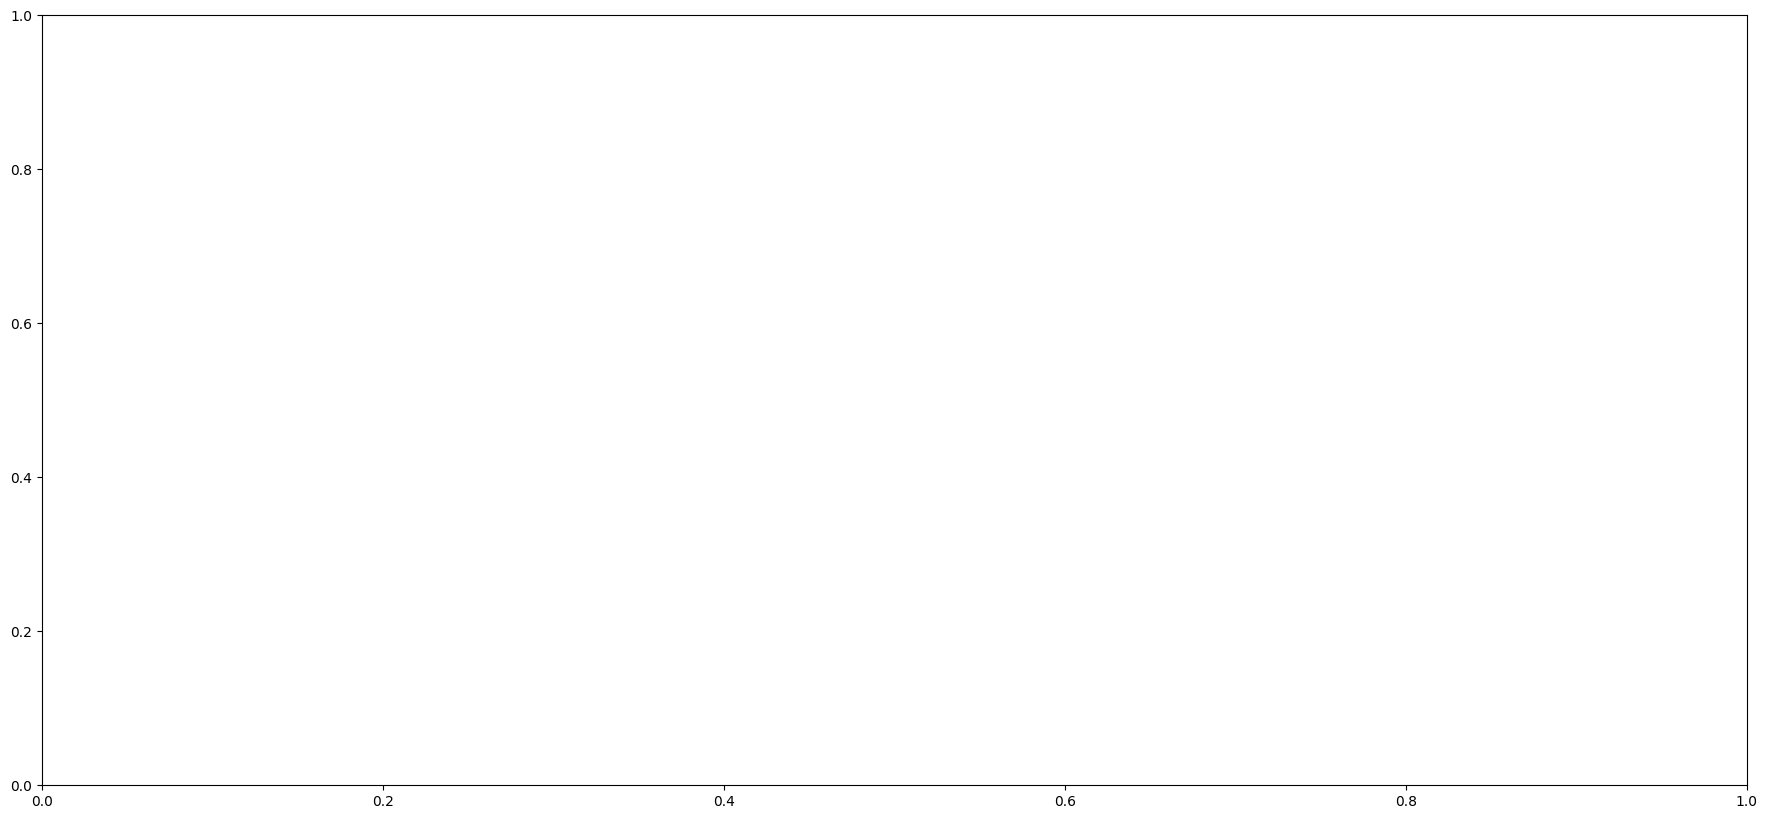

In [11]:
# Visualización del arbol
# ==============================================================================

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(22,10))

print(f'profundidad del arbol: {clf.get_depth()}')
print(f'numero de terminales: {clf.get_n_leaves()}')

plot=plot_tree(
    decision_tree=clf,
    feature_names=X.columns,
    class_names=['False','True'],
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)

In [12]:
#Importacia de cada factor 
columns=pd.DataFrame(X.columns).rename(columns={0:'columns'})
#Creación del Data frame con el nivel de importacia
importances=pd.DataFrame(clf.feature_importances_).rename(columns={0:'importances'})
cf=pd.concat([columns,importances], axis=1)

In [13]:
#Se organiza el Dataframe de mayor a menor y se escoge el top 10
cf=cf.sort_values('importances',ascending=False).head(10)

In [14]:
#Creación del gráfico
fig = px.bar(cf, x='importances', y='columns', color = 'columns',  title ='<b>Importancia de los factores que analiza el modelo  (Top 10) <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

Gradient Boosting Classifier
C:\Users\Dell\OneDrive - Universidad de Antioquia\Escritorio\Analitica\1_entrega_1\1_proyecto.ipynb

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento del modelo
# ==============================================================================
gboos=GradientBoostingClassifier()
gboos.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier()

In [17]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 0.8948412698412699
Train - classification report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2962
           1       0.90      0.39      0.54       566

    accuracy                           0.89      3528
   macro avg       0.90      0.69      0.74      3528
weighted avg       0.90      0.89      0.88      3528

Test - Accuracy : 0.8832199546485261
Test - classification report :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       737
           1       0.86      0.34      0.49       145

    accuracy                           0.88       882
   macro avg       0.87      0.67      0.71       882
weighted avg       0.88      0.88      0.86       882



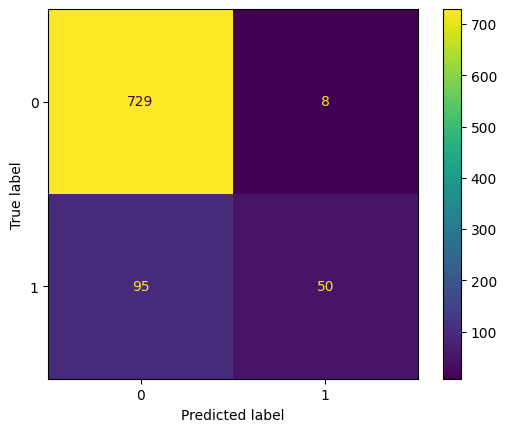

In [20]:
#Matriz de confusion
cm1=confusion_matrix(y_test,gboos.predict(X_test))
# Visualización de la matriz de confusion
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1)
cm1_display.plot()
plt.show()

In [21]:
#Importacia de cada factor 
columns=pd.DataFrame(X.columns).rename(columns={0:'columns'})
#Creación del Data frame con el nivel de importacia
importances=pd.DataFrame(gboos.feature_importances_).rename(columns={0:'importances'})
cf=pd.concat([columns,importances], axis=1)

In [22]:
#Se organiza el Dataframe de mayor a menor y se escoge el top 10
cf=cf.sort_values('importances',ascending=False).head(10)

In [23]:
#Creación del gráfico
fig = px.bar(cf, x='importances', y='columns', color = 'columns',  title ='<b>Importancia de los factores que analiza el modelo  (Top 10) <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)